# Beer Consumption

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Read dataset

In [2]:
data_path = 'dataset/Consumo_cerveja.csv'

In [3]:
raw_data = pd.read_csv(data_path)

In [4]:
raw_data

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing

### Dropna

In [5]:
raw_data.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [6]:
raw_data.dropna(axis=0, how='all', inplace=True)

In [7]:
raw_data.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

### Check for zeros

In [8]:
(raw_data==0).sum()

Data                             0
Temperatura Media (C)            0
Temperatura Minima (C)           0
Temperatura Maxima (C)           0
Precipitacao (mm)                0
Final de Semana                261
Consumo de cerveja (litros)      0
dtype: int64

### Replace comma by dot

In [9]:
def real_brazilian_to_float(numeric_string):
    """Converte valores numérios no formato brasileiro 1.234,56 para float"""
    try:
        return float(numeric_string.replace(".", "").replace(",", "."))
    except:
        return numeric_string 

In [10]:
cols_to_dot = ['Temperatura Media (C)',
               'Temperatura Minima (C)',
               'Temperatura Maxima (C)',
               'Precipitacao (mm)']

In [11]:
for cols in cols_to_dot:
    raw_data[cols] = raw_data[cols].apply(real_brazilian_to_float)

### Convert 'Data' column type

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [13]:
raw_data['Data'] = raw_data['Data'].astype('datetime64[ns]')

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


**Checkpoint**

In [15]:
data_pp = raw_data.copy()

In [16]:
data_pp.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


## Graphical analysis

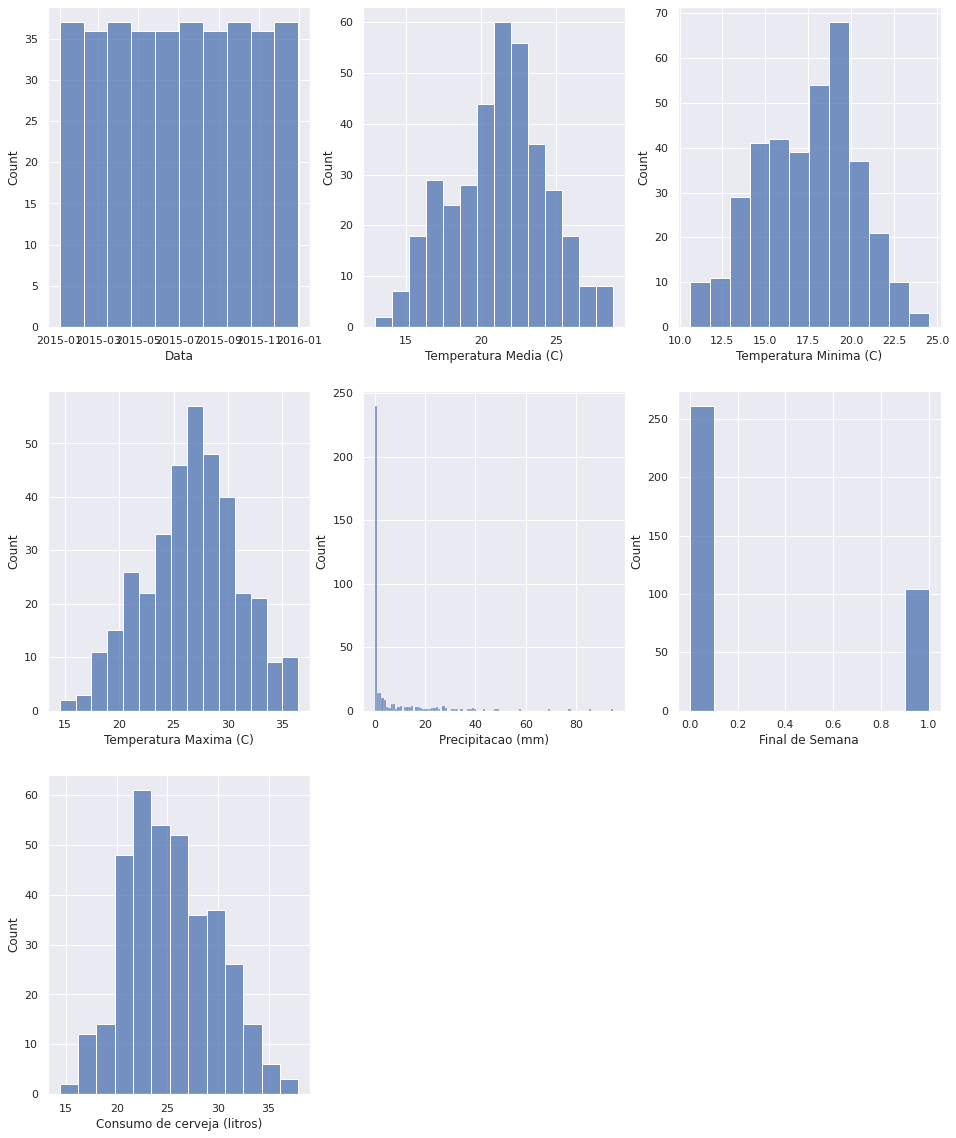

In [17]:
plt.figure(figsize=(16,20))
for i, column in enumerate(data_pp.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(data_pp[column])

In [18]:
q = data_pp['Precipitacao (mm)'].quantile(0.75)
data_1 = data_pp[data_pp['Precipitacao (mm)']<1]

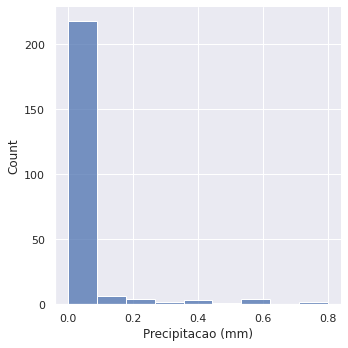

In [19]:
sns.displot(data_1['Precipitacao (mm)'])

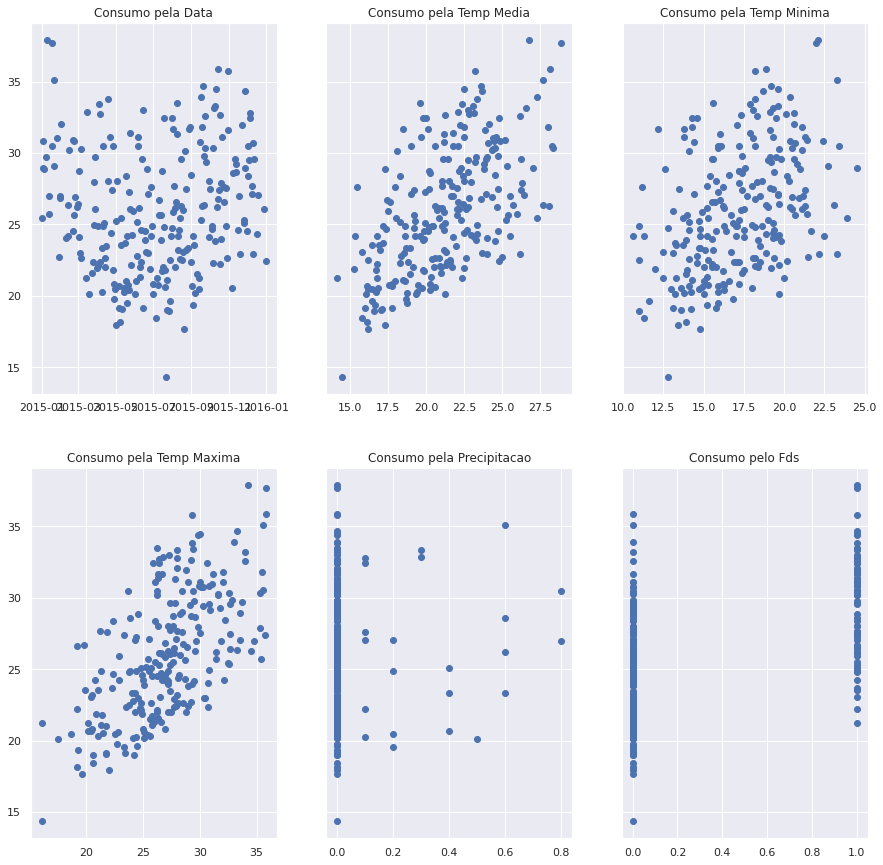

In [20]:
f, axs = plt.subplots(2, 3, sharey=True, figsize =(15,15))
axs[0,0].scatter(data_1['Data'],data_1['Consumo de cerveja (litros)'])
axs[0,0].set_title('Consumo pela Data')
axs[0,1].scatter(data_1['Temperatura Media (C)'],data_1['Consumo de cerveja (litros)'])
axs[0,1].set_title('Consumo pela Temp Media')
axs[0,2].scatter(data_1['Temperatura Minima (C)'],data_1['Consumo de cerveja (litros)'])
axs[0,2].set_title('Consumo pela Temp Minima')
axs[1,0].scatter(data_1['Temperatura Maxima (C)'],data_1['Consumo de cerveja (litros)'])
axs[1,0].set_title('Consumo pela Temp Maxima')
axs[1,1].scatter(data_1['Precipitacao (mm)'],data_1['Consumo de cerveja (litros)'])
axs[1,1].set_title('Consumo pela Precipitacao')
axs[1,2].scatter(data_1['Final de Semana'],data_1['Consumo de cerveja (litros)'])
axs[1,2].set_title('Consumo pelo Fds')


plt.show()

## Scaling/Normalizing

**Checkpoint**

In [21]:
df = data_1

In [22]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,21.228833,17.148750,26.995833,0.032083,0.291667,25.971346
std,3.158161,2.918674,4.126299,0.122781,0.455480,4.384748
min,14.180000,10.600000,16.100000,0.000000,0.000000,14.343000
25%,18.890000,14.900000,24.400000,0.000000,0.000000,22.536250
50%,21.190000,17.200000,27.100000,0.000000,0.000000,25.484000
75%,23.320000,19.300000,29.525000,0.000000,1.000000,29.303000
max,28.860000,24.500000,35.800000,0.800000,1.000000,37.937000


---

## KNN Regressor implementation

#### Importing libraries

In [23]:
import scipy.spatial
from collections import Counter
from sklearn.model_selection import train_test_split

#### Declare the dependent and independent variables

In [24]:
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [25]:
data_cols = ['Temperatura Media (C)',
             'Temperatura Minima (C)',
             'Temperatura Maxima (C)',
             'Precipitacao (mm)']

In [26]:
X = df[data_cols].values
y = list(df['Consumo de cerveja (litros)'])

#### Split data in training ans test data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

#### The KNN class

In [28]:
# https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def mean_distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            sumk = 0.0
            for d, j in d:
                sumk += y_train[j]
            meank = round(sumk/self.k, 3)
            final_output.append(meank)
        return final_output
    
    def mse(self, X_test, y_test):
        predictions = self.predict(X_test)
        sum_square = 0.0
        n = len(X_test)
        for i in range(n):
            sum_square += (y_test[i] - predictions[i])**2
        print(sum_square)
        mean_square = sum_square/n
        return mean_square

#### Testing the algorithm

In [29]:
beer = KNN(3)
beer.fit(X_train, y_train)
prediction = beer.predict(X_test)

# for i in range(len(prediction)):
#     print(f"Previsão: {prediction[i]}. Observado: {y_test[i]}")

In [30]:
comp = pd.DataFrame()
comp['Previsão'] = prediction
comp['Observado'] = y_test

In [31]:
comp.head()

,Previsão,Observado
0,29.441,25.692
1,30.771,25.743
2,21.644,25.142
3,22.776,27.146
4,26.117,23.898


In [32]:
beer.mse(X_test, y_test)

636.7369430000002


13.265352979166671